In [2]:

from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [13]:
new_model = tf.keras.models.load_model("/home/admin238/Desktop/ML_WEEK_10/CIFAR10/CIFAR-10.h5")
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],x_train.shape[3])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],x_test.shape[3])
#x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [18]:
prediction = new_model.predict([x_test])
print(prediction)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
print(np.argmax(prediction[1]))

1


In [4]:
# CIFAR - 10

# To decode the files
import pickle
# For array manipulations
import numpy as np
# To make one-hot vectors
from keras.utils import np_utils
# To plot graphs and display images
from matplotlib import pyplot as plt


#constants

path = ""  # Path to data 

# Height or width of the images (32 x 32)
size = 32 

# 3 channels: Red, Green, Blue (RGB)
channels = 3  

# Number of classes
num_classes = 10 

# Each file contains 10000 images
image_batch = 10000 

# 5 training files
num_files_train = 5  

# Total number of training images
images_train = image_batch * num_files_train

# https://www.cs.toronto.edu/~kriz/cifar.html


def unpickle(file):  
    
    # Convert byte stream to object
    with open(path + file,'rb') as fo:
        print("Decoding file: %s" % (path+file))
        dict = pickle.load(fo, encoding='bytes')
       
    # Dictionary with images and labels
    return dict




def convert_images(raw_images):
    
    # Convert images to numpy arrays
    
    # Convert raw images to numpy array and normalize it
    raw = np.array(raw_images, dtype = float) / 255.0
    
    # Reshape to 4-dimensions - [image_number, channel, height, width]
    images = raw.reshape([-1, channels, size, size])

    images = images.transpose([0, 2, 3, 1])

    # 4D array - [image_number, height, width, channel]
    return images


def load_data(file):
    # Load file, unpickle it and return images with their labels
    
    data = unpickle(file)
    
    # Get raw images
    images_array = data[b'data']
    
    # Convert image
    images = convert_images(images_array)
    # Convert class number to numpy array
    labels = np.array(data[b'labels'])
        
    # Images and labels in np array form
    return images, labels


def get_test_data():
    # Load all test data
    
    images, labels = load_data(file = "test_batch")
    
    # Images, their labels and 
    # corresponding one-hot vectors in form of np arrays
    return images, labels, np_utils.to_categorical(labels,num_classes)

images_test, labels_test, class_test = get_test_data()

Decoding file: test_batch


airplane
truck
dog
horse
truck
ship
dog
horse
ship
frog


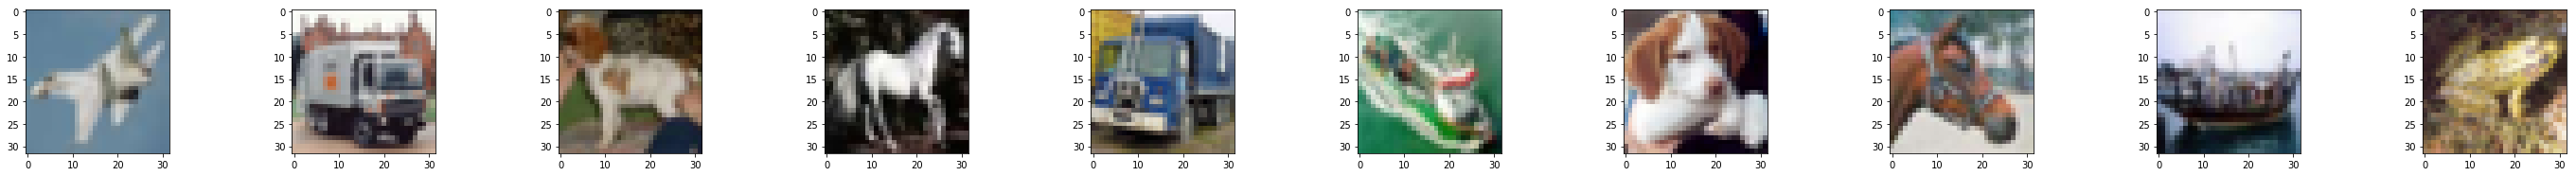

In [10]:
fig=plt.figure(figsize=(100, 100))
columns = 20
rows = 30
for i in range(10,20):

    output = labels_test[i]
    if(output == 0):
        print("airplane")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 1):
        print("automobile")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 2):
        print("bird")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 3):
        print("cat")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 4):
        print("deer")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 5):
        print("dog")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 6):
        print("frog")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 7):
        print("horse")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 8):
        print("ship")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    if(output == 9):
        print("truck")
        fig.add_subplot(rows, columns, i)
        plt.imshow(images_test[i])
    

5
